In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv('../data_fleet.csv', sep='\t')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [4]:
k1=df['Distance_Feature'].values
k2=df['Speeding_Feature'].values

X=np.matrix(list(zip(k1,k2)))
kmeans=KMeans(n_clusters=2).fit(X)

In [5]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [7]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
centroids

array([[  50.04763437,    8.82875   ],
       [ 180.017075  ,   18.29      ]])

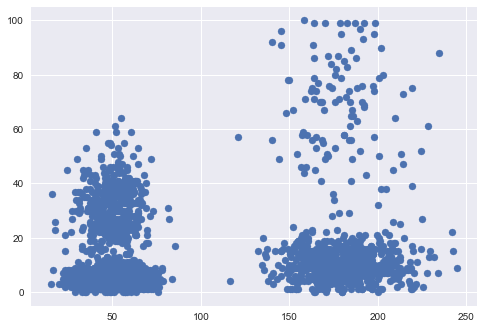

In [9]:
plt.scatter(df.Distance_Feature,df.Speeding_Feature)
plt.show()

### The scikit-learn package also has a function that allows you to get the centroids and labels directly

In [10]:
from sklearn import cluster
centroids,labels,inertia = cluster.k_means(df,n_clusters=2)

In [11]:
# save the cluster labels and sort by cluster
df['cluster'] = labels
df.sort('cluster')

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Driver_ID,Distance_Feature,Speeding_Feature,cluster
2682,3423313536,65.76,9.0,0
1414,3423313619,63.94,4.0,0
3291,3423314396,165.23,57.0,0
1412,3423313502,45.39,6.0,0
2298,3423313608,43.54,4.0,0
1410,3423312639,58.13,7.0,0
1409,3423312696,58.67,6.0,0
1408,3423314025,33.32,8.0,0
3293,3423313215,166.22,77.0,0
1406,3423313305,37.21,5.0,0


In [12]:
df.groupby('cluster').mean()

,Driver_ID,Distance_Feature,Speeding_Feature
cluster,,,
0,3423313448,74.335948,10.844922
1,3423311448,77.745392,10.597201


In [13]:
# save the DataFrame of cluster centers
centers = df.groupby('cluster').mean()

In [14]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [15]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['yellow', 'black', 'green', 'red'])

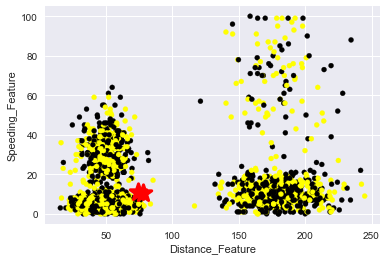

In [16]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df.Distance_Feature, df.Speeding_Feature, c=colors[df.cluster], s=25)

plt.scatter(centers.Distance_Feature, centers.Speeding_Feature, linewidths=3, marker='*', s=300, c='red')

# add labels
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
